# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv('data/human_body_temperature.csv')

In [2]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


In [3]:
mean = np.mean(df["temperature"])
std = np.std(df["temperature"])
n = len(df["temperature"].dropna())

In [4]:
samples = np.random.normal(mean, std, size=10000)

In [5]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [6]:
x, y = ecdf(df["temperature"])
x_theor, y_theor = ecdf(samples)

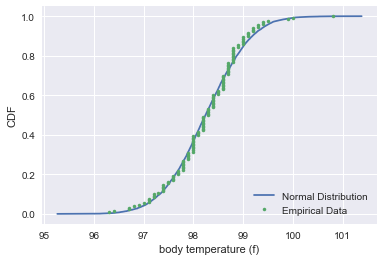

In [7]:
sns.set()
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker=".", linestyle="none")
_ = plt.xlabel("body temperature (f)")
_ = plt.ylabel("CDF")
_ = plt.legend(('Normal Distribution', 'Empirical Data'), loc='lower right')
plt.show()

In [8]:
stats.normaltest(df["temperature"])

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

## 1. Is the distribution of body temperatures normal? 

The normal CDF overlaid with the data CDF shows promise that the data may be normally distributed. It's very close to the curve, but there are some spots with visible variance. A null hypothesis asserts that the temperature data is distributed normally. SciPy's handy normaltest function, produces a p-value of 0.2587, far too high to reject the null hypothesis that the data conforms to a normal distribution. The temperature data therefore is normally distributed.

## 2. Is the sample size large? Are the observations independent? 

As far as the Central Limit Theorem is concerned, the sample size of 130 observations is sufficiently large, as it is above the commonly espoused minimum of 30 samples. The observations can be declared indepedent as well, because one person's temperature does not affect another's. The data is naturally unordered.

## 3. Is the true population mean really 98.6 degrees F?

Since the sample data not being compared to another group, a one-sample test can be used. The data is assumed to follow the normal distribution. That condition, plus the large sample size (> 30 observations) allow the preferable Z-Test.

Null Hypothesis: The true population mean is equal to the conventional mean 98.6 F

Alternative hypothesis: The true population mean is not equal to the conventional mean 98.6 F

For this test, a 95% confidence level will be used

In [9]:
# z_critical value for normal distribution given a two-tailed error
# the z-critical value for 95% confidence is commonly represented as 1.96 as per textbook lookup tables
z_critical = stats.norm.ppf(q = 0.975)

# sigma represents the population standard deviation for which we use the sample standard deviation
sigma = std

# margin of error for the sample mean is computed as such
moe = z_critical * sigma / np.sqrt(n)

# show the 95% confidence interval
ci = (mean - moe, mean + moe)

print("The 95% confidence interval is", ci)

The 95% confidence interval is (98.123682111456645, 98.37477942700491)


Since the given population mean of 98.6 is not found within the 95% confidence interval, the null hypothesis is rejected.

A T-Test could be arguably more relevant, as it doesn't assume the population standard deviation is the same as the sample's. The same hypothesis and confidence requirement will be used.

In [10]:
stats.ttest_1samp(df["temperature"], 98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [11]:
# this t value shows how much the sample differs from the null hypothesis
t_test_statistic = stats.ttest_1samp(df["temperature"], 98.6).statistic
pvalue           = stats.ttest_1samp(df["temperature"], 98.6).pvalue

print("t_test_statistic:", t_test_statistic)
print("pvalue:", pvalue)

# next, check the quantiles of the t-distribution of the with 95% confidence
test_stat1 = stats.t.ppf(.025, n-1)
print("test_stat2:", test_stat1)

test_stat2 = stats.t.ppf(.975, n-1)
print("test_stat2:", test_stat2)

# now check the probability of the sample's occurrance given that the null hypothesis is true
pvalue2 = stats.t.cdf(t_test_statistic, n-1) * 2

print("pvalue2:", pvalue2)

t_test_statistic: -5.45482329236
pvalue: 2.41063204156e-07
test_stat2: -1.97852449146
test_stat2: 1.97852449146
pvalue2: 2.41063204156e-07


A p-value of 2.41e-07 means that observing data as extreme as the sample would happen about 0.0000241% of the time if the null hypothesis were true. In this case, the p-value is much lower than the significance level of 0.05, so the null hypothesis is rejected, as intuitively expected.

A T-distribution is similar to a normal distribution, but varies by sample size. As sample size increases, the curve narrows, approaching the normal curve. With a sample of 130 observations, the curve is still wider, producing a larger critical value and wider confidence interval, shown below.

In [12]:
stats.t.interval(alpha=.95, df=n-1, loc=mean, scale=std / np.sqrt(n))

(98.12249318821641, 98.375968350245145)

## 4. Draw a small sample of size 10 from the data and repeat both tests.

Small Sample

In [13]:
# drawing a small sample of size 10
small_n = 10
small = np.random.choice(df["temperature"], small_n)
small_mean = np.mean(small)
small_std = np.std(small)
print(small)

[ 98.9  97.9  97.7  97.9  97.9  97.6  99.   98.8  97.8  99. ]


Z-Test

In [14]:
# z_critical value for normal distribution given a two-tailed error
# the z-critical value for 95% confidence is commonly represented as 1.96 as per textbook lookup tables
small_z_critical = stats.norm.ppf(q = 0.975)

# sigma represents the population standard deviation for which we use the sample standard deviation
small_sigma = small_std

# margin of error for the sample mean is computed as such
small_moe = small_z_critical * small_sigma / np.sqrt(small_n)

# show the 95% confidence interval
small_ci = (small_mean - small_moe, small_mean + small_moe)

print("The 95% confidence interval is", small_ci)

The 95% confidence interval is (97.902417089155946, 98.597582910844054)


T-Test

In [15]:
# this t value shows how much the sample differs from the null hypothesis
small_t_test_statistic = stats.ttest_1samp(df["temperature"], 98.6).statistic
small_pvalue           = stats.ttest_1samp(df["temperature"], 98.6).pvalue

print("t_test_statistic:", small_t_test_statistic)
print("pvalue:", small_pvalue)

# next, check the quantiles of the t-distribution of the with 95% confidence
small_test_stat1 = stats.t.ppf(.025, small_n-1)
print("test_stat2:", small_test_stat1)

small_test_stat2 = stats.t.ppf(.975, small_n-1)
print("test_stat2:", small_test_stat2)

# now check the probability of the sample's occurrance given that the null hypothesis is true
small_pvalue2 = stats.t.cdf(small_t_test_statistic, small_n-1) * 2

print("pvalue2:", small_pvalue2)

t_test_statistic: -5.45482329236
pvalue: 2.41063204156e-07
test_stat2: -2.26215716274
test_stat2: 2.26215716274
pvalue2: 0.000403129999163


In [16]:
stats.t.interval(alpha=.95, df=small_n-1, loc=small_mean, scale=small_std / np.sqrt(small_n))

(97.84882570413825, 98.65117429586175)

Now that the sample size is reduced to below the magical, statistical threshold of 30, the T-Test should be more appropriate. Both tests now produce increased margins of error and often include the given population mean of 98.6 degrees, preventing the consistent rejection of the null hypothesis at 95% confidence in the sample. The confidence intervals above for Z and T tests reject and retain the null hypothesis respectively.

This illustrates the importance of repeating experiments and the value of drawing more samples.

## 5. At what temperature should we consider someone's temperature to be "abnormal"?

As of 2018, it has become difficult to label someone as abnormal. In this exercise, a prediction interval is used to make a defensible attempt at doing so.

In [17]:
print(ci)
low, high = ci
abnormals = (df["temperature"] < low).sum() + (df["temperature"] > high).sum()
print("The 95% confidence interval would suggest", str(abnormals), "of 130 people are abnormal")

(98.123682111456645, 98.37477942700491)
The 95% confidence interval would suggest 115 of 130 people are abnormal


Disregarding the assignment's suggestion to use a confidence interval, a prediction interval is used to find the range that encompasses 95% of observations.

In [18]:
# prediction interval with t-distribution
t_critical = stats.t.ppf(0.975, n-1)
mean - t_critical * np.sqrt(1 + 1/n) * std, mean + t_critical * np.sqrt(1 + 1/n) * std

(96.798652852736836, 99.699808685724719)

In [19]:
# prediction interval with normal distribution
stats.norm.interval(0.95, loc=mean, scale=std)

(96.81775582674824, 99.680705711713316)

In [20]:
# good old fashioned quantile definition
df["temperature"].quantile(.05), df["temperature"].quantile(.95)

(97.04499999999999, 99.3)

## 6. Is there a significant difference between males and females in normal temperature?

 - What test did you use and why?
 - Write a story with your conclusion in the context of the original problem. 




Null Hypothesis: The true population mean is equal to the conventional mean 98.6 F

Alternative hypothesis: The true population mean is not equal to the conventional mean 98.6 F

In [21]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [22]:
mtemp = df["temperature"][df["gender"] == "M"]
ftemp = df["temperature"][df["gender"] == "F"]

In [23]:
mtemp.describe()

count    65.000000
mean     98.104615
std       0.698756
min      96.300000
25%      97.600000
50%      98.100000
75%      98.600000
max      99.500000
Name: temperature, dtype: float64

In [24]:
ftemp.describe()

count     65.000000
mean      98.393846
std        0.743488
min       96.400000
25%       98.000000
50%       98.400000
75%       98.800000
max      100.800000
Name: temperature, dtype: float64

In [25]:
xm, ym = ecdf(mtemp)
xf, yf = ecdf(ftemp)
x_theor, y_theor = ecdf(samples)

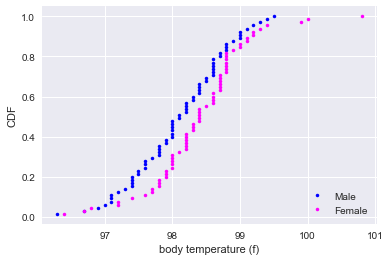

In [26]:
sns.set()
_ = plt.plot(xm, ym, marker=".", linestyle="none", color="blue")
_ = plt.plot(xf, yf, marker=".", linestyle="none", color="magenta")
_ = plt.xlabel("body temperature (f)")
_ = plt.ylabel("CDF")
_ = plt.legend(('Male', 'Female'), loc='lower right')
plt.show()

Plotting the CDFs implies that there is significant difference betewen them. A permutation test will determine the significance and difference. A permutation test simulates what the data would look like if the temperatures for the two genders were identically distributed.

In [27]:
def permutation_sample(data1, data2):
    
    # first construct a single array with all the observations in it
    temps = np.concatenate((mtemp, ftemp))

    # scramble the entries in the array
    temps_perm = np.random.permutation(temps)

    # create permutation samples
    perm_m = temps_perm[:len(mtemp)]
    perm_f = temps_perm[len(mtemp):]
    
    return perm_m, perm_f

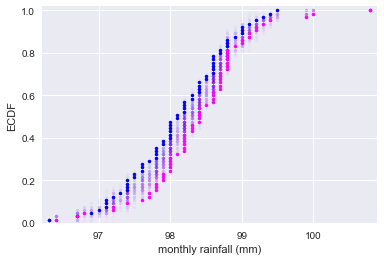

In [28]:
# now to take a statistically relevant number of permutation samples
for i in range(50):
    # generate sample with above function
    perm_sample_1, perm_sample_2 = permutation_sample(mtemp, ftemp)
    
    #compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)
    
    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='blue', alpha=0.02)
    _ = plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='magenta', alpha=0.02)
    

_ = plt.plot(xm, ym, marker='.', linestyle='none', color='blue')
_ = plt.plot(xf, yf, marker='.', linestyle='none', color='magenta')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

Most of the ECDFs from the permutation samples do not overlap the observed data, suggesting that the hypothesis is not supported.

The empirical difference of the means is the difference of means of the male and female observations.

In [29]:
# the test statistic is the difference of means, so that function will be used
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

In [30]:
empirical_diff_means = diff_of_means(mtemp, ftemp)
print(empirical_diff_means)

-0.289230769230727


A distribution of permutation replicates of this test statistic can be used to identify the probability of the test statistic exhibiting of a mean difference at least as extreme as what was observed. In other words, how likely is it that the observed difference of mean temperatures between males and females would be -0.289 degrees F supposing the null hypothesis that the true population mean difference is 0 degrees.

In [31]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

By repeating the drawing of permuted replicates, a distribution of replicates is created

In [32]:
permutation_replicates = draw_perm_reps(mtemp, ftemp, diff_of_means, 10000)

The visualization of the permutation replicates is shown below.

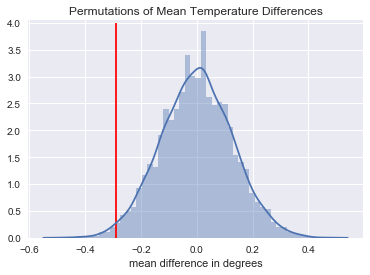

In [33]:
# plot the permutation replicates
sns.distplot(permutation_replicates)
plt.xlabel("mean difference in degrees")

# draw a line showing the empirical difference of means. the area to the left is the probability
plt.vlines(ymin=0, ymax=4,
           x=empirical_diff_means, 
           color="red")

plt.title("Permutations of Mean Temperature Differences")


plt.show()

The probability of observing a difference in mean temps at least as extreme as the empirical difference of -0.289 is given by the ratio of permutation replicates that meet that extreme value.

In [34]:
p_probability = np.sum(permutation_replicates <= empirical_diff_means) / len(permutation_replicates)
print(p_probability)

0.0121


As the number of permutation replicates increases, the distribution approaches the normal distribution. This means that the probability or p-value can also be ascertained by looking up a z-score representing the number of standard deviations away the test statistic is from the mean of zero.

In [35]:
# get standard deviation of permutation replicates
perm_std = np.std(permutation_replicates)

# convert empirical difference to standard deviations
z_score = empirical_diff_means / perm_std

# look up p value for z_score
p_lookup = 1 - stats.norm.sf(z_score)

print(p_lookup)

0.0120426374914


These P values indicate that were there no difference between male and female temperatures, the observation in the original sample would be 1.26% or 1.32% likely to occur. Given a 95% confidence level, the null hypothesis that there is no difference cannot be retained. The significance level of 0.05 is greater than the p value of 0.126

## Conclusion

The original problem asked if the commonly accepted normal body temperature of 98.6 degrees F reported by Carl Wunderlich was a statistically correct value. In tests against this sample of 130 individuals, evidence was not found that corroborates 98.6 degrees as a global mean, although it was still found to be in the range of normality. Furthermore, a significant difference between male and female body temperatures was discovered, further challenging the simplicity of a universal figure of normality. 